In [18]:
from sklearn.svm import LinearSVR
from sklearn.datasets import california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import pandas as pd

import numpy as np

In [19]:
cal_house = california_housing.fetch_california_housing()

In [20]:
house_data = pd.DataFrame(cal_house.data,columns=cal_house.feature_names)
house_data['price'] = cal_house.target
house_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
# remove the 'price column from the dataframe again'
house_data = pd.DataFrame(cal_house.data,columns=cal_house.feature_names)

In [22]:
trainX,testX, trainY,testY = train_test_split(house_data,cal_house.target,random_state=123)

In [23]:
trainX.shape

(15480, 8)

In [24]:
testX.shape

(5160, 8)

In [25]:
trainY

array([0.678, 1.375, 0.98 , ..., 2.862, 4.125, 0.593])

In [26]:
svm = LinearSVR()
svm.fit(trainX,trainY)

/home/gk/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [27]:
svm.coef_

array([ 2.71854000e-01,  9.61513324e-03,  5.83119708e-02, -2.42324595e-01,
        2.09207798e-04, -9.41896910e-02, -1.62608322e-01, -5.20512161e-02])

In [28]:
svm.intercept_

array([-0.09489733])

In [29]:
pred = svm.predict(testX)

In [30]:
pd.DataFrame({'target':testY,'pred':pred})


,target,pred
0,1.516,1.496980
1,0.992,1.585142
2,1.345,2.157397
3,2.317,1.698511
4,4.629,2.197636
...,...,...
5155,0.870,1.188822
5156,2.099,1.869687
5157,1.096,1.671765
5158,0.379,1.166000


In [31]:
# MSE
np.mean((testY - pred)**2)

1.4185376271814472

In [32]:
cal_house.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [33]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, 'r--',)

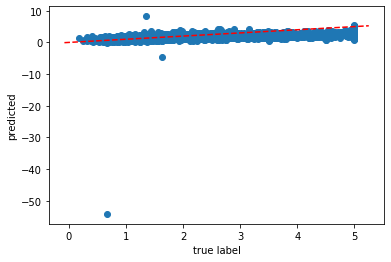

In [34]:
import matplotlib.pyplot as plt
import pylab

plt.scatter(testY,pred)
abline(1,0)
plt.xlabel('true label')
plt.ylabel('predicted')
plt.show()